
# Cloning quasars

Download the SDSS quasars data.


In [17]:
# Import the data:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']


## Tasks, part 1

1. Upsample this distribution in two ways, using both rejection sampling and inverse transform.
2. Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: scipy.stats is your best friend)


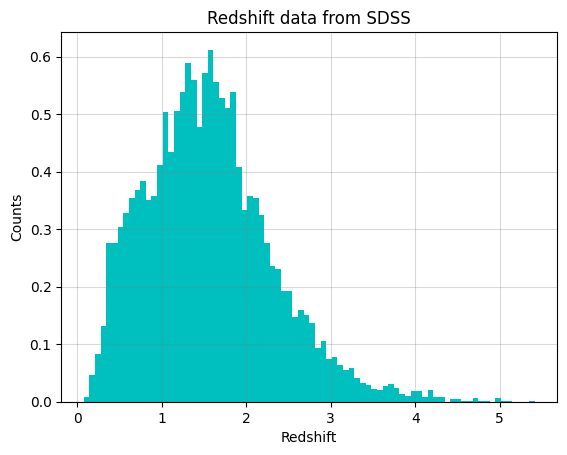

In [87]:
import numpy as np
import matplotlib.pyplot as plt

N_bins = 80
heights, bins, patches = plt.hist(z, bins = N_bins, density = True, color = 'c', histtype = 'stepfilled', label = 'SDSS data')
plt.grid(alpha=0.3, c = 'grey')
plt.xlabel('Redshift')
plt.ylabel('Counts')
plt.title('Redshift data from SDSS')
plt.show()


## Upsampling by using rejection sampling


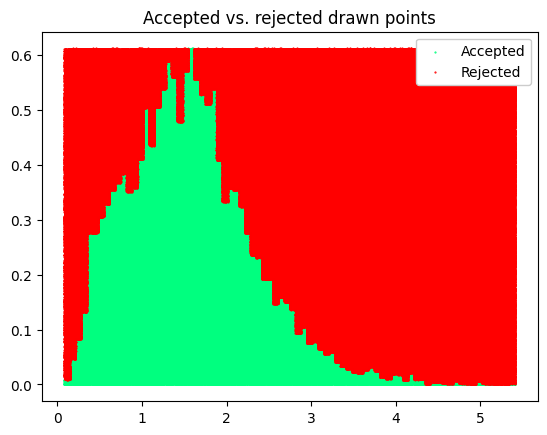

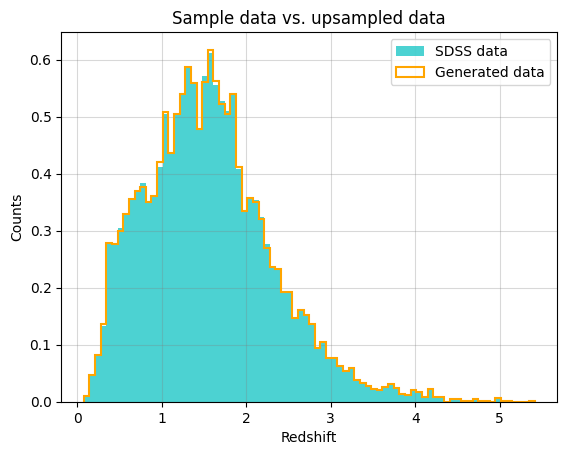

In [89]:
import scipy.stats

# Using scipy.stats to generate the pdf given the histogram
f = scipy.stats.rv_histogram((heights, bins), density = True)
# plt.plot(np.linspace(0, 5, 10000), f.pdf(np.linspace(0, 5, 10000)))     # Plotting the pdf

# Drawing the N points by using an uniform distribution to propose new samples, between min(z) and max(z).
N = 1000000     # N = 1000000 follows the sample data very nicely
x = np.random.uniform(low=min(z), high=max(z), size = N)
y = np.random.uniform(low=0, high=max(heights), size = N)

# Evaluating and accepting/rejecting the points:
good_points = x[y<f.pdf(x)]

# Representation of the accepted and rejected points:
plt.scatter(x[y<f.pdf(x)],y[y<f.pdf(x)],c='springgreen', s=0.3, label = 'Accepted')
plt.scatter(x[y>f.pdf(x)],y[y>f.pdf(x)],c='red', s=0.3, label = 'Rejected')
plt.title('Accepted vs. rejected drawn points')
plt.legend(loc='upper right', framealpha = 1)
plt.show()

# Confronting the sample data with the upsampled:
plt.hist(z, bins = N_bins, density = True, color = 'c', histtype = 'stepfilled', alpha = 0.7, label = 'SDSS data')
plt.hist(good_points, bins = N_bins, density = True, color = 'orange', histtype = 'step', linewidth = 1.5, label = 'Generated data')
plt.xlabel('Redshift')
plt.ylabel('Counts')
plt.title('Sample data vs. upsampled data')
plt.legend(loc='upper right')
plt.grid(alpha = 0.3, c='gray')
plt.show()


## Upsampling through inverse trasform


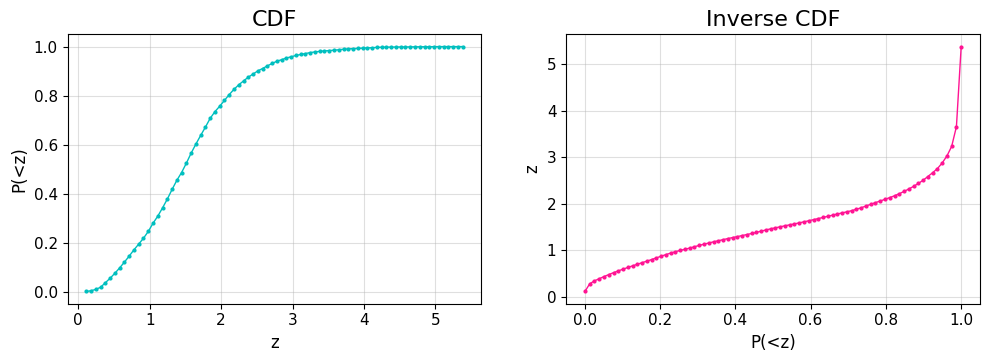

In [90]:
# Compute the cdf
cdf = np.cumsum(heights)/np.sum(heights)

bin_centers = []
for i in range(len(bins)-1):
    bin_centers.append((bins[i]+bins[i+1])/2)
bin_centers = np.array(bin_centers)

# Interpolate the inverse cdf
inv_cdf = scipy.interpolate.interp1d(cdf, bin_centers)

# Plot the cdf and the inverse cdf
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(bin_centers, cdf, lw = 1, marker = 'o', ms = 2, color='c')
ax[0].grid(alpha=0.4)
ax[0].tick_params(labelsize=11)
ax[0].set_xlabel('z', fontsize=12)
ax[0].set_ylabel('P(<z)', fontsize = 12)
ax[0].set_title('CDF', fontsize=16)

x = np.linspace(min(cdf), max(cdf), len(bin_centers))
ax[1].plot(x, inv_cdf(x), lw = 1, marker = 'o', ms = 2, color='deeppink')
ax[1].grid(alpha=0.4)
ax[1].tick_params(labelsize=11)
ax[1].set_xlabel('P(<z)', fontsize=12)
ax[1].set_ylabel('z', fontsize = 12)
ax[1].set_title('Inverse CDF', fontsize=16)

plt.tight_layout(rect=[0, 0.05, 1, 0.98], w_pad=3.0)

plt.show()

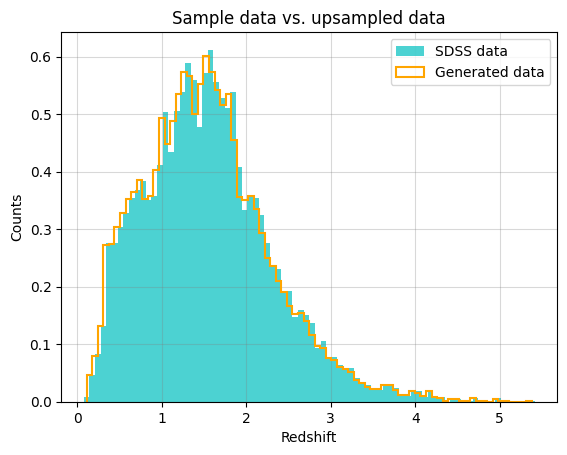

In [91]:
points = np.random.uniform(min(cdf), max(cdf), N)
z_sample = inv_cdf(points)

# Confronting the generated data with the original data:
plt.hist(z, bins = N_bins, density = True, color = 'c', histtype = 'stepfilled', alpha = 0.7, label = 'SDSS data')
plt.hist(z_sample, bins = N_bins, density = True, color = 'orange', histtype = 'step', linewidth = 1.5, label = 'Generated data')
plt.xlabel('Redshift')
plt.ylabel('Counts')
plt.title('Sample data vs. upsampled data')
plt.legend(loc='upper right')
plt.grid(alpha = 0.3, c='gray')
plt.show()

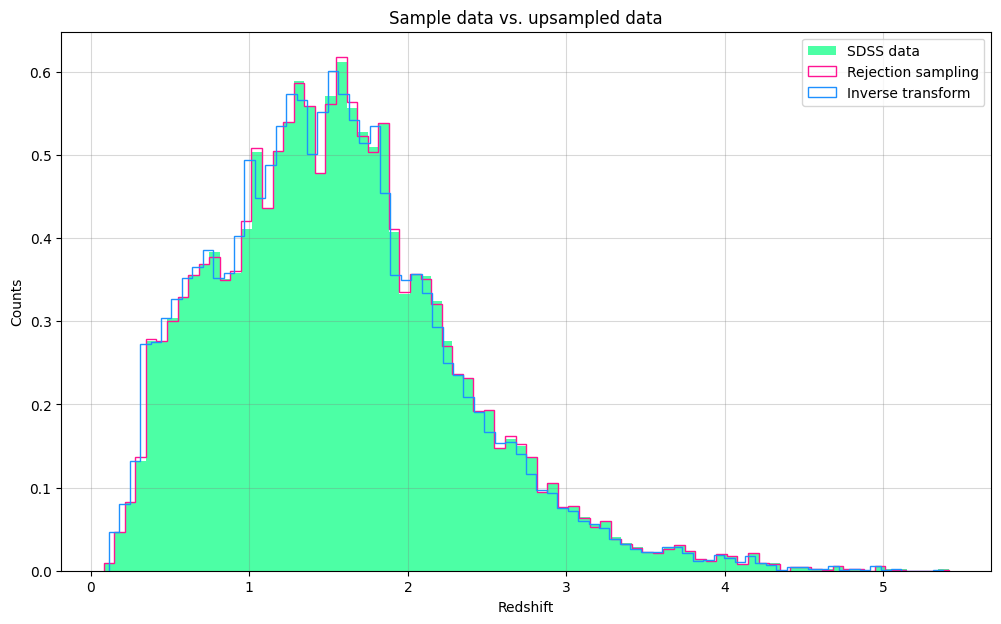

In [97]:
# Confronting the results
plt.figure(figsize=(12, 7))
plt.hist(z, bins = N_bins, density = True, color = 'springgreen', histtype = 'stepfilled', alpha = 0.7, label = 'SDSS data')
plt.hist(good_points, bins = N_bins, density = True, color = 'deeppink', histtype = 'step', linewidth = 1, label = 'Rejection sampling')
plt.hist(z_sample, bins = N_bins, density = True, color = 'dodgerblue', histtype = 'step', linewidth = 1, label = 'Inverse transform')
plt.xlabel('Redshift')
plt.ylabel('Counts')
plt.title('Sample data vs. upsampled data')
plt.legend(loc='upper right')
plt.grid(alpha = 0.3, c='gray')
plt.show()


## Tasks, part 2

3. Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?

(Hint: It shouldn't. But why?)